## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 1. Make a list of categorical and numerical columns in the data.

In [6]:
# list of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['total_bill', 'tip', 'size']

In [7]:
# list of categorical columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

['sex', 'smoker', 'day', 'time']

### 2. Compute the average bill amount for each day.

In [8]:
# average bill for each day
average_bill_per_day = df.groupby('day')['total_bill'].mean()
average_bill_per_day

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [10]:
df.groupby('sex')['tip'].mean().idxmax()

'Male'

- Males are more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [13]:
mealtime_count = df['time'].value_counts()
mealtime_count

Dinner    176
Lunch      68
Name: time, dtype: int64

- There are more customers for dinner 

### 5. Based on the statistical summary, comment on the variable 'tip'

In [14]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- There are some ouliers as we can see where max tip is very higher than that of the mean

### 6. Find the busiest day in terms of the orders?

In [16]:
busiest_day = df['day'].value_counts().idxmax()
print(f"The busiest day in terms of orders is {busiest_day}")

The busiest day in terms of orders is Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [17]:
# Checking for skewness
total_skewness = df['total_bill'].skew()
total_skewness

1.1332130376158205

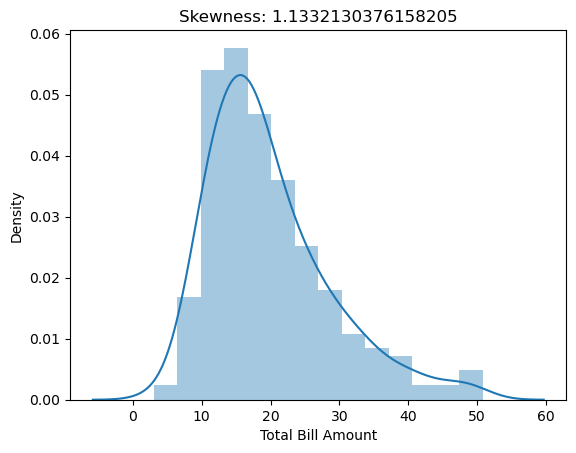

In [19]:
# using plot for showing skewness
sns.distplot(df['total_bill'], kde=True)
plt.title(f'Skewness: {total_skewness}')
plt.xlabel('Total Bill Amount')
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

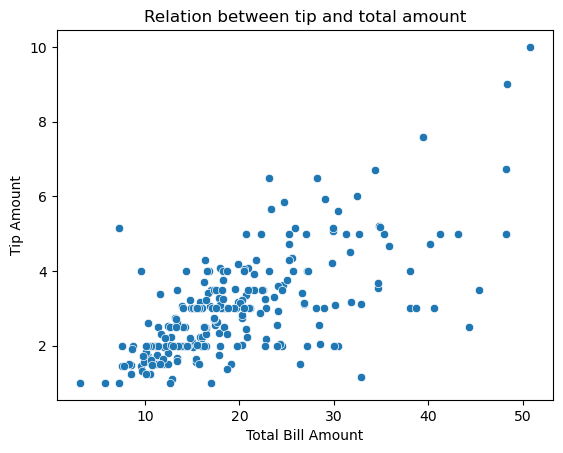

Correlation coefficient: 0.68


In [20]:
# cheking relationship between tip amount and total bill using scatterplot
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relation between tip and total amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.show()

# Correletion between 'total_bill' and 'tip'
correlation = df['total_bill'].corr(df['tip'])
print(f"Correlation coefficient: {correlation:.2f}")

#### As the correlation value is close to 1 that means there is strong positive relation between 'total bill' and 'tip'

### 9. What is the percentage of males and females in the dataset? and display it in the plot

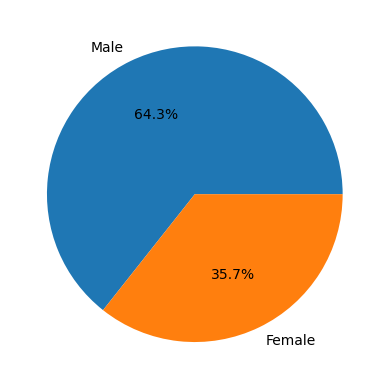

In [21]:
x = df['sex'].value_counts()
plt.pie(x, labels=['Male', 'Female'], autopct="%.1f%%");

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [22]:
#  show gender-wise count based on smoking habit
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

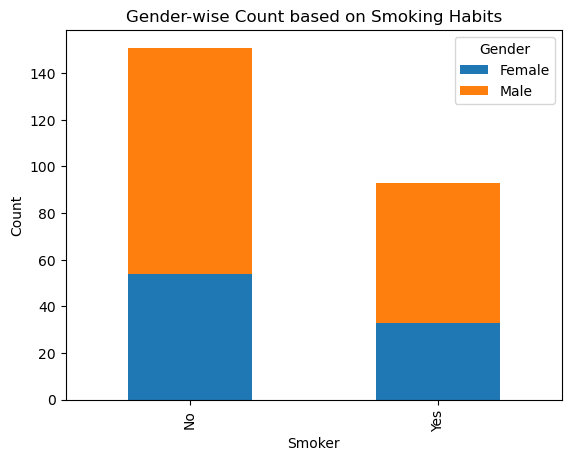

In [23]:
# Create a stacked bar plot to show gender-wise count based on smoking habits
smoker_counts = df.groupby(['smoker', 'sex']).size().unstack()
smoker_counts.plot(kind='bar', stacked=True)
plt.title("Gender-wise Count based on Smoking Habits")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


### 11. Compute the average tip amount given for different days and display it in the plot.

In [24]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

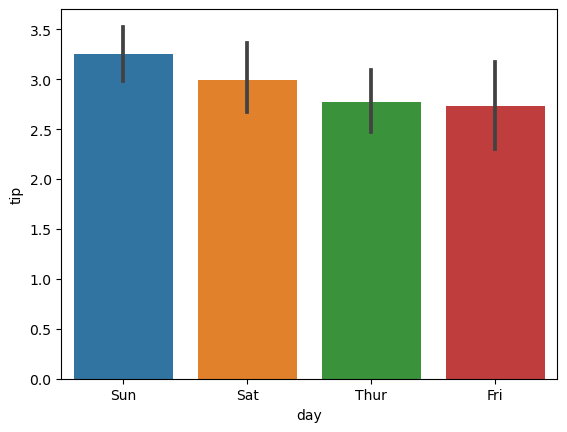

In [25]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

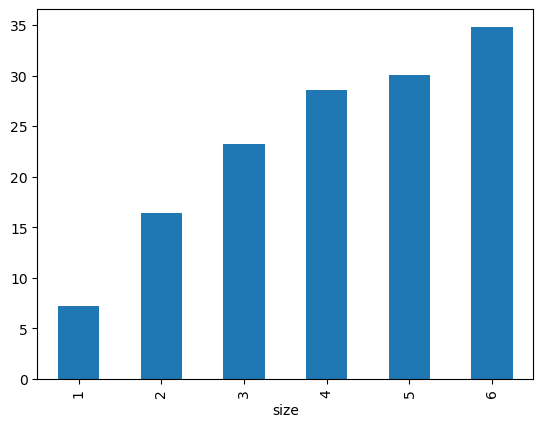

In [26]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

- Yes the average bill amount is dependent on the size of the group

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

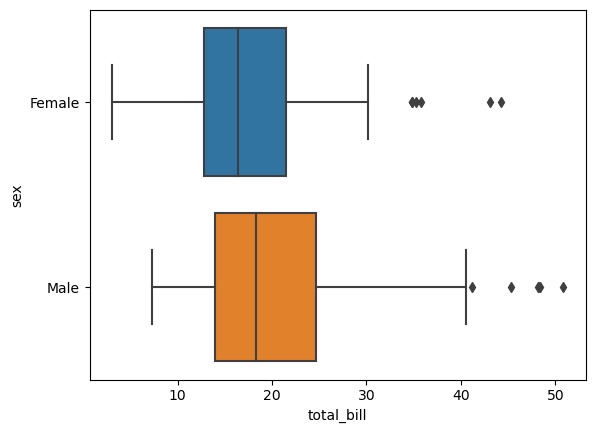

In [27]:
sns.boxplot(x='total_bill',y='sex', data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [28]:
df.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [29]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [30]:
len(df[df.duplicated()])

1

- Yes, there is one duplicate record so now we will drop that

In [32]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [33]:
# rechecking duplicates
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

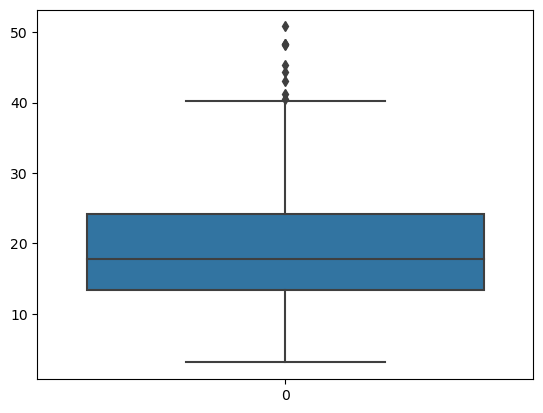

In [34]:
# boxplot before
sns.boxplot(df['total_bill'])
plt.show()

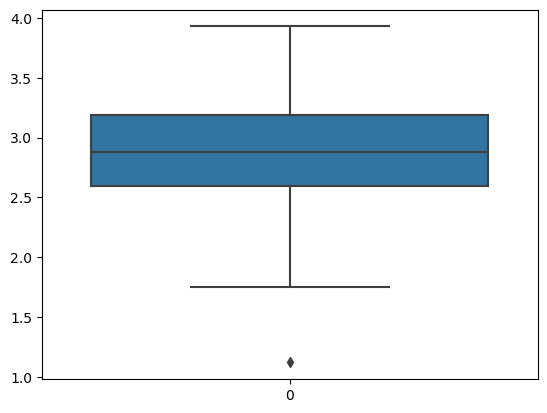

In [35]:
# treating outliers
df['total_bill'] = np.log(df['total_bill'])

# showing by boxplot after treatment
sns.boxplot(df['total_bill'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

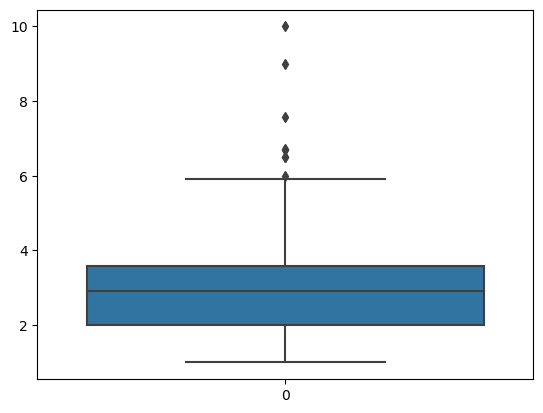

In [36]:
sns.boxplot(df['tip'])
plt.show()

In [37]:
# using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1
lower_whishker = Q1-(1.5*IQR)
upper_whishker = Q3-(1.5*IQR)

In [38]:
df_out = df.loc[(df['tip'] < upper_whishker) & (df['tip'] > lower_whishker)] 

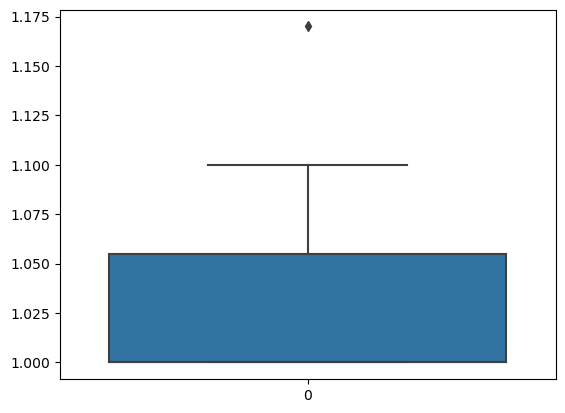

In [39]:
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [41]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
177,2.672768,2.00,2,1,1,0,1,0,0
37,2.829087,3.07,3,0,0,1,0,0,0
64,2.867331,2.64,3,1,0,1,0,0,0
142,3.718196,5.00,5,1,0,0,0,1,1
235,2.309561,1.25,2,1,0,1,0,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [46]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max - tb_min
print(range_)

2.8064156240065348


In [47]:
mm = MinMaxScaler()

In [48]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [49]:
# checking the range aftr normalization
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max - tb_mm_min
print(range_)

1.0000000000000002


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [50]:
# loading the data set againg as 'tips_df'
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [51]:
# Encoding categorical variables
tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0


In [53]:
# Storing the target column in Y variable and the rest of the columns in the X variable.
x = tips_df.drop('tip', axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [59]:
# split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# Scaling the data using min max scaling
mm = MinMaxScaler()

x_train.iloc[:,:2] = mm.fit_transform(x_train.iloc[:,:2])
x_test.iloc[:,:2] = mm.transform(x_test.iloc[:,:2])


(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [61]:
# fitting a linear regression model on the train data
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
# making predictions on the test data 
pred = lr.predict(x_test)

In [63]:
# compute r2_score
print('r2-score test:', r2_score(y_test, pred))

r2-score test: 0.48989489575386813


### Happy Learning:)